In [1]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Visualize image

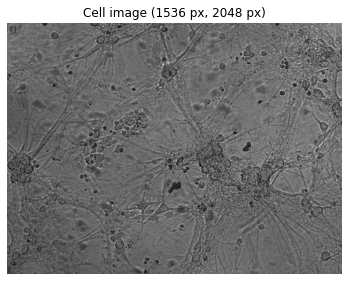

In [2]:
# Load image
#data_path = 'data/Cells-40x-1_0131_Trans.tif'
#data_path = 'data/F3 1_0068_Trans.tif'
data_path = 'data/empty/empty_0158_Trans.tif'
cell_im = skimage.io.imread(data_path)
im_h, im_w = cell_im.shape

# Display MRI image
def plot(image):
    im_h, im_w = image.shape
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    ax.set_title('Cell image ({} px, {} px)'.format(im_h, im_w))
    ax.axis('off')
    plt.show()

plot(cell_im)

# Histogram

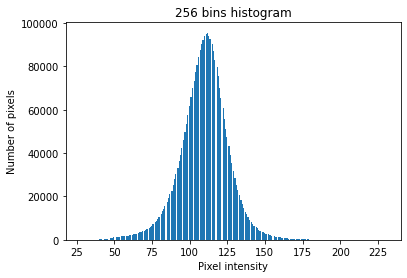

In [3]:
def plot_hist(image):
    nb_bins = 256

    # Display histogram
    plt.figure(figsize=(6, 4))
    plt.hist(image.ravel(), bins=nb_bins)
    plt.xlabel('Pixel intensity')
    plt.ylabel('Number of pixels')
    plt.title(f"{nb_bins} bins histogram")

    plt.show()
    
plot_hist(cell_im)

# TEST EQUALIZATION

In [4]:
# Display MRI image
def plot_diff(image, original = cell_im):
    im_h, im_w = image.shape
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('New image ({} px, {} px)'.format(im_h, im_w))
    ax[0].axis('off')
    
    im_h, im_w = original.shape
    ax[1].imshow(original, cmap='gray')
    ax[1].set_title('Original image ({} px, {} px)'.format(im_h, im_w))
    ax[1].axis('off')
    
    plt.show()

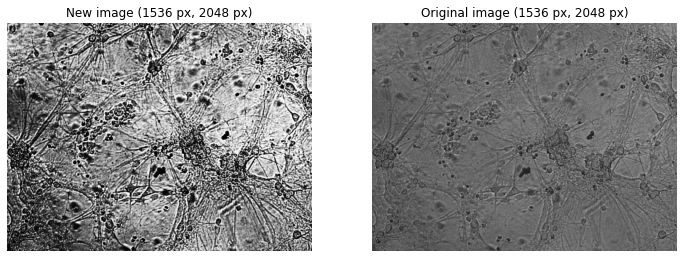

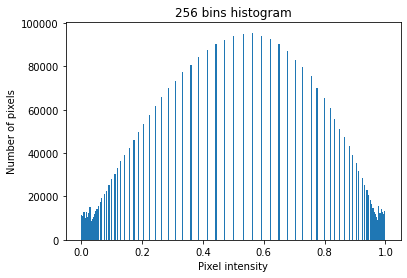

In [5]:
cell_equalize = skimage.exposure.equalize_hist(cell_im,)

plot_diff(cell_equalize)
plot_hist(cell_equalize)

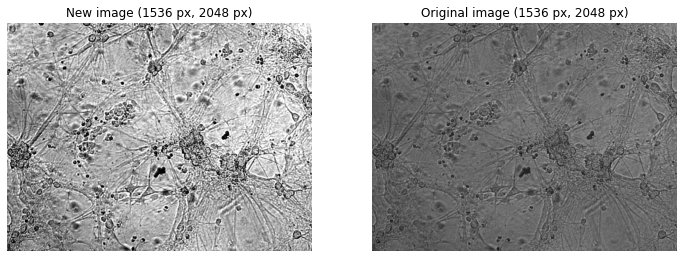

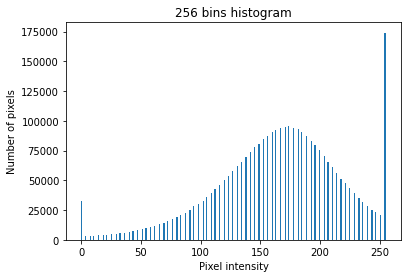

In [6]:
p2, p98 = np.percentile(cell_im, (1, 95))

cell_rescale = skimage.exposure.rescale_intensity(cell_im, in_range=(p2, p98))

plot_diff(cell_rescale)
plot_hist(cell_rescale)

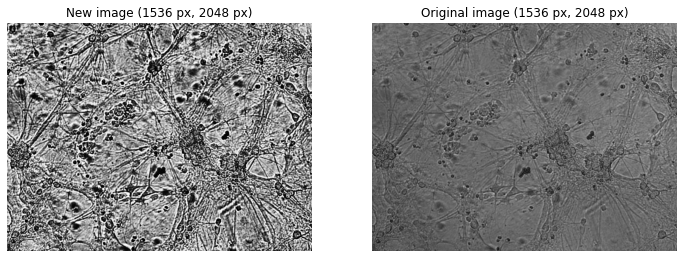

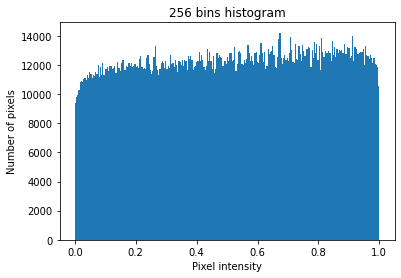

In [7]:
cell_adapt = skimage.exposure.equalize_adapthist(cell_im, clip_limit=0.05)

plot_diff(cell_adapt)
plot_hist(cell_adapt)

## TEST CONTOURS

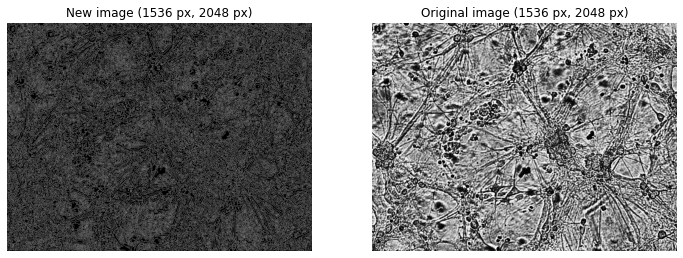

In [8]:
from skimage import feature

edges1 = feature.canny(cell_adapt, sigma=1)

plot_diff(edges1, cell_adapt)

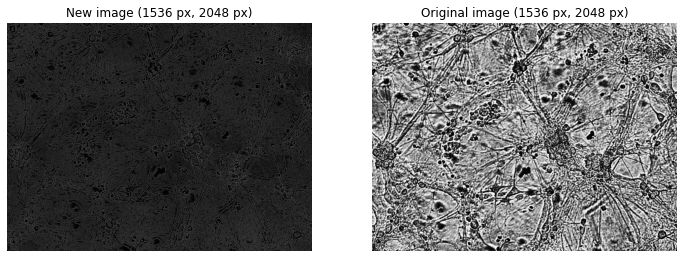

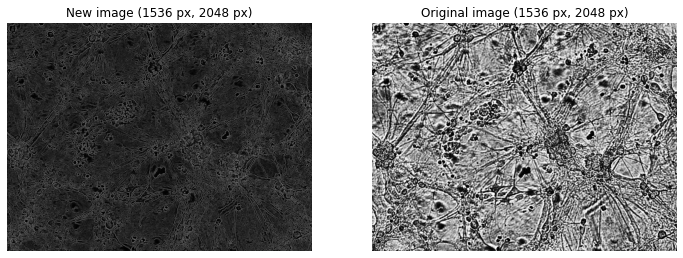

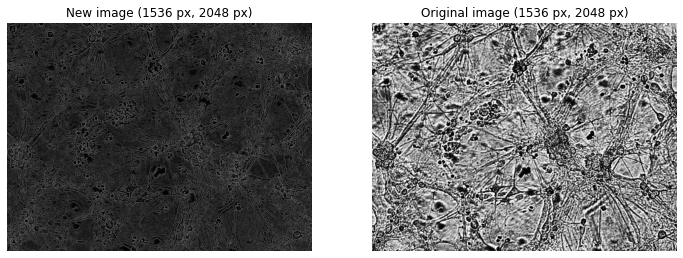

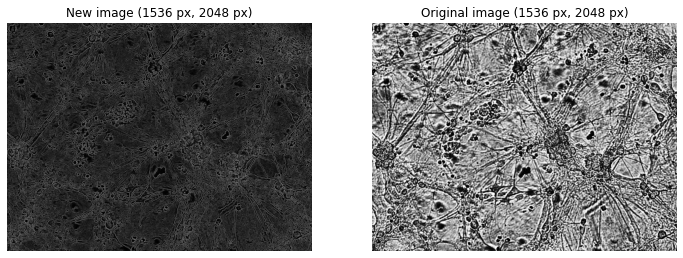

In [9]:
from skimage import filters

edge_roberts = filters.roberts(cell_adapt)
edge_sobel = filters.sobel(cell_adapt) # best ?
edge_scharr = filters.scharr(cell_adapt)
edge_prewitt = filters.prewitt(cell_adapt)

plot_diff(edge_roberts, cell_adapt)
plot_diff(edge_sobel, cell_adapt)
plot_diff(edge_scharr, cell_adapt)
plot_diff(edge_prewitt, cell_adapt)

## Test on rescaled hist

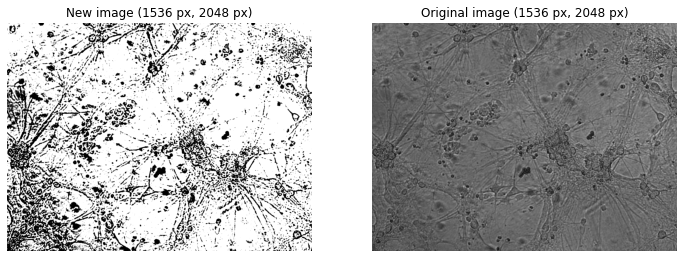

In [10]:
cell_rescale_clip = cell_rescale.copy()

threshold1 = 125
threshold2 = 50

mask1 = (cell_rescale_clip >= threshold1)
mask2 = (cell_rescale_clip < threshold2)

cell_rescale_clip[mask1] = 255
cell_rescale_clip[~mask1] = 0

plot_diff(cell_rescale_clip)

## Test on image adapted hist

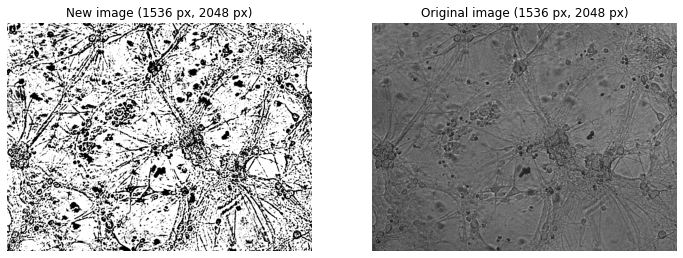

In [11]:
cell_adapt_clip = cell_adapt.copy()

threshold = 0.3

cell_adapt_clip[cell_adapt_clip >= threshold] = 1
cell_adapt_clip[cell_adapt_clip < threshold] = 0

plot_diff(cell_adapt_clip)

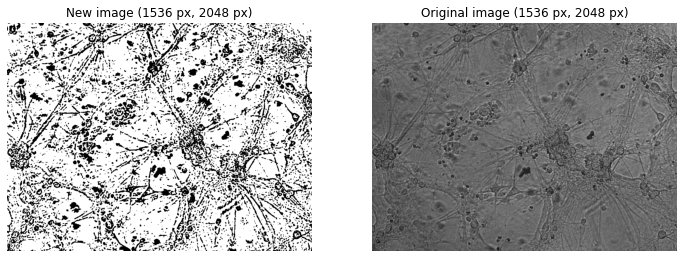

In [12]:
from skimage import morphology

square = morphology.square(3)

im_closing2 = morphology.binary_closing(cell_adapt_clip, square)

plot_diff(im_closing2)

## Test on canny filter

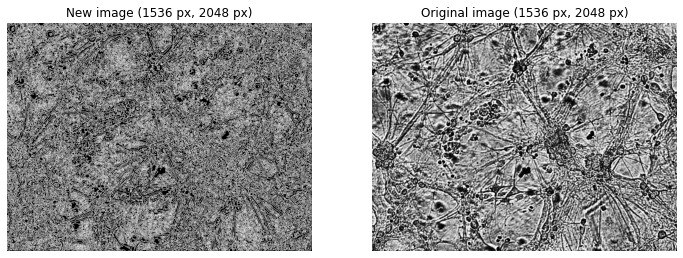

In [13]:
square = morphology.square(2)

im_dilation = morphology.binary_dilation(edges1, square)

plot_diff(im_dilation, cell_adapt)

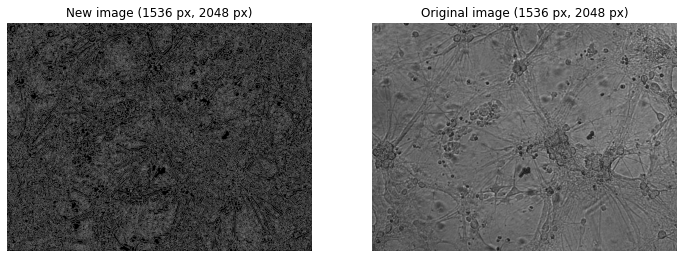

In [14]:
canny_clip = edges1.copy()
threshold = 0.3

canny_clip[canny_clip > threshold] = 1
canny_clip[canny_clip <= threshold] = 0

plot_diff(canny_clip)

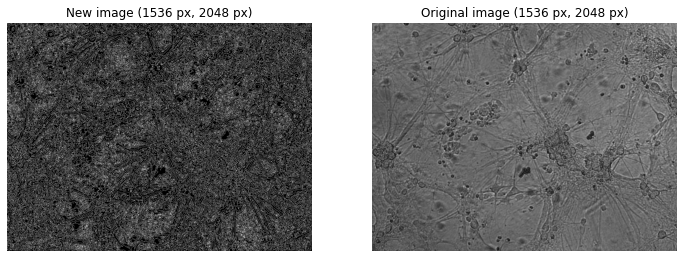

In [15]:
square = morphology.square(2)

im_closing = morphology.binary_closing(canny_clip, square)

plot_diff(im_closing)

## Test on sobel

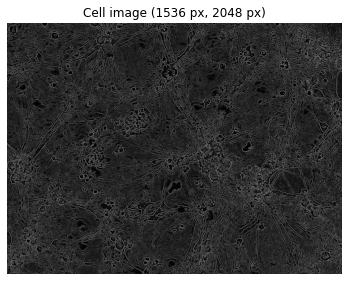

In [16]:
plot(edge_sobel)

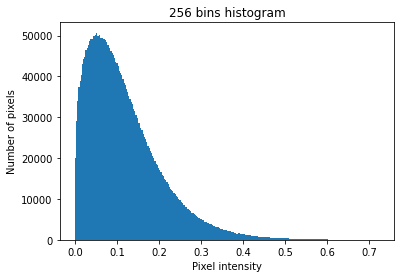

In [17]:
plot_hist(edge_sobel)

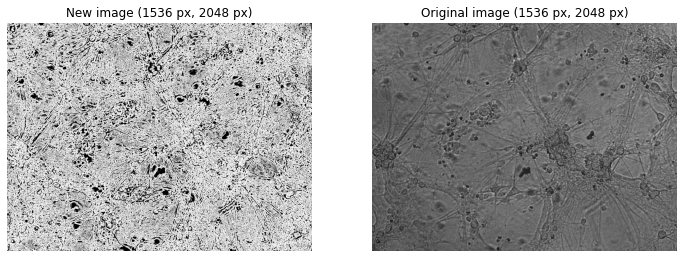

In [18]:
sobel_clip = edge_sobel.copy()

threshold = 0.06

sobel_clip[sobel_clip > threshold] = 1
sobel_clip[sobel_clip <= threshold] = 0

plot_diff(sobel_clip)

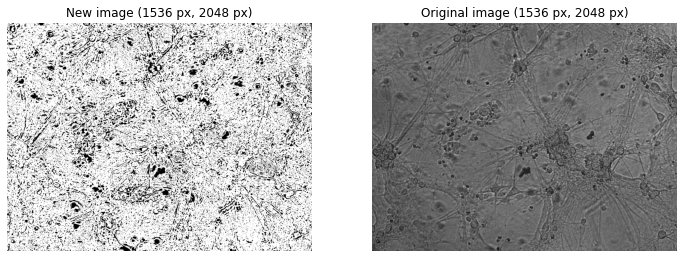

In [19]:
square = morphology.square(2)

im_dilation3 = morphology.binary_closing(sobel_clip, square)

plot_diff(im_dilation3)

## TEST CONVOLUTION

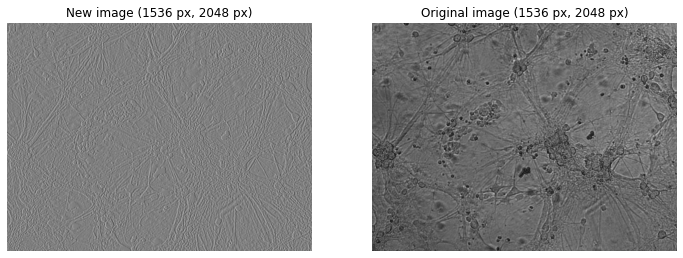

In [29]:
import scipy.ndimage as ndi

mask = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
# Apply non-separable Filter
vedge_ndi = ndi.convolve(cell_adapt, mask)

plot_diff(vedge_ndi)

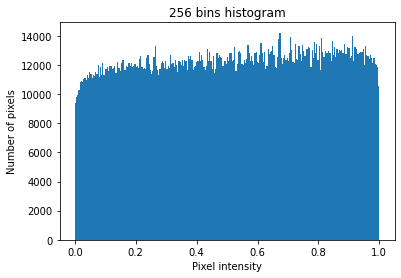

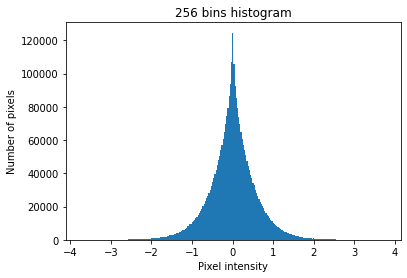

In [31]:
plot_hist(cell_adapt)
plot_hist(vedge_ndi)

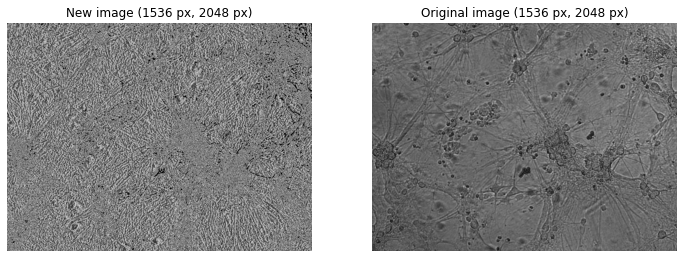

In [32]:
vedge_ndi2 = ndi.convolve(cell_rescale, mask)

plot_diff(vedge_ndi2)

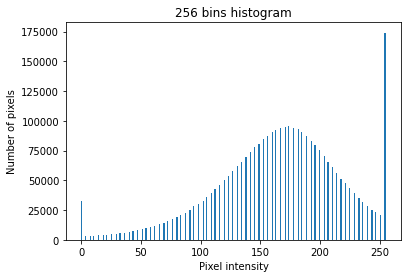

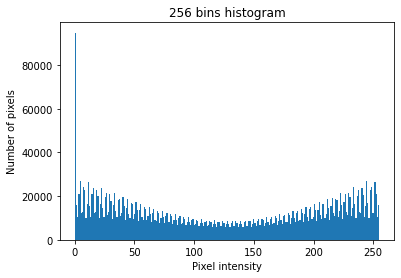

In [33]:
plot_hist(cell_rescale)
plot_hist(vedge_ndi2)

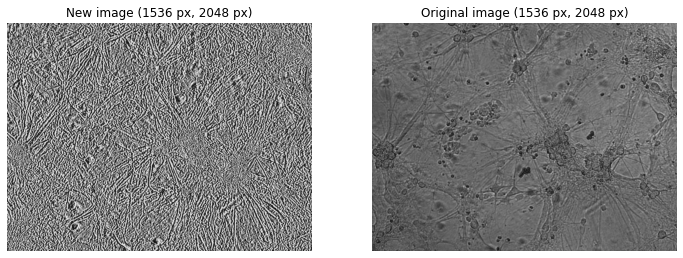

In [34]:
vedge_ndi3 = ndi.convolve(cell_im, mask)

plot_diff(vedge_ndi3)

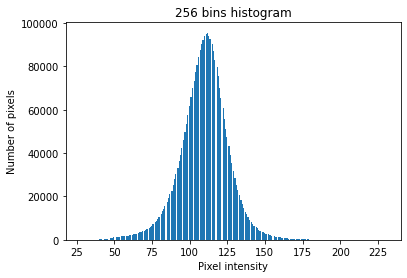

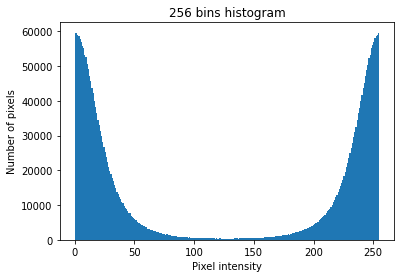

In [35]:
plot_hist(cell_im)
plot_hist(vedge_ndi3)

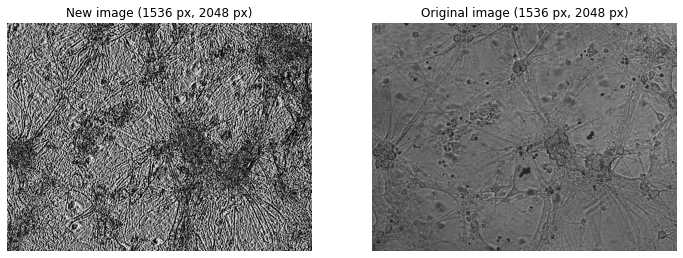

In [47]:
vedge_clip = vedge_ndi3.copy()

threshold =220

vedge_clip[vedge_clip > threshold] = 250
vedge_clip[vedge_clip <= threshold] = 0

plot_diff(vedge_clip)